In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import jaccard_simil

In [8]:
df1=pd.read_csv("dataset_recsys1_engineered.csv")
df2=pd.read_csv("dataset_recsys2_engineered_droptur.csv")

## Baseline model for RecSys 1 - Cosine Similarity

In [9]:
df1

,Country Name,Travel Destination,Things to Do,Location,Review Count,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,tur aktivitasluarruangan transportasi turdenga...,"Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182.0,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
1,Indonesia,Seminyak,tur spadankebugaran aktivitasluarruangan tempa...,"Kecamatan Kuta, Indonesia",451212,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874.0,https://www.tripadvisor.co.id/Flights-g469404-...,Rp 1.305.700
2,Indonesia,Bali,tur aktivitasluarruangan turdenganperahudanola...,Indonesia,2998882,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190.0,https://www.tripadvisor.co.id/Flights-g294226-...,Rp 1.145.870
3,Indonesia,Ubud,tur aktivitasluarruangan spadankebugaran trans...,"Gianyar Regency, Indonesia",610495,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927.0,https://www.tripadvisor.co.id/Flights-g297701-...,Rp 1.145.870
4,Indonesia,Jakarta,tur tempatbelanja spadankebugaran aktivitaslua...,"Jawa, Indonesia",339358,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563.0,https://www.tripadvisor.co.id/Flights-g294229-...,NaN
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,tur turdenganperahudanolahragaair aktivitaslua...,"Nusa Penida, Indonesia",742,https://www.tripadvisor.co.id/Hotels-g14115586...,663636.0,https://www.tripadvisor.co.id/Flights-g1411558...,Rp 1.752.927
316,Indonesia,Singakerta,spadankebugaran tur kursusdansanggar hiburanda...,"Ubud, Indonesia",2019,https://www.tripadvisor.co.id/Hotels-g15880600...,661107.0,https://www.tripadvisor.co.id/Flights-g1588060...,Rp 1.752.927
317,Indonesia,Guwang,wisataalamdantaman cocokuntukpasangan hargater...,"Sukawati, Indonesia",343,https://www.tripadvisor.com/Hotels-g19140131-G...,235636.0,https://www.tripadvisor.com/CheapFlightsSearch...,1724800
318,Indonesia,Singapadu Kaler,tur turdenganperahudanolahragaair aktivitaslua...,"Sukawati, Indonesia",309,https://www.tripadvisor.co.id/Hotels-g20116867...,627097.0,https://www.tripadvisor.co.id/Flights-g2011686...,Rp 1.197.735


In [10]:
cv = CountVectorizer()
cv_result = cv.fit_transform(df1['Things to Do'])

In [11]:
cv.get_feature_names()

['acara',
 'aktivitasluarruangan',
 'bagussaathujan',
 'berjiwapetualang',
 'cocokuntukanakanak',
 'cocokuntukkelompokbesar',
 'cocokuntukpasangan',
 'cocokuntukpenggemaraktivitasekstrem',
 'hargaterjangkau',
 'hiburandanpermainan',
 'hiburanmalam',
 'kasinodanperjudian',
 'kebunbinatangdanakuarium',
 'konserdanpertunjukan',
 'kursusdansanggar',
 'lokasibulanmadu',
 'makanandanminuman',
 'masukgratis',
 'museum',
 'pemandangandantengara',
 'spadankebugaran',
 'sumberinformasiwisatawan',
 'tamanairdantamanhiburan',
 'tempatbelanja',
 'tempatyangbelumpopuler',
 'transportasi',
 'tur',
 'turdenganperahudanolahragaair',
 'wisataalamdantaman']

In [271]:
cv_df = pd.DataFrame(cv_result.todense(),columns= cv.get_feature_names(),index=df1['Travel Destination'])
cv_df

,acara,aktivitasluarruangan,bagussaathujan,berjiwapetualang,cocokuntukanakanak,cocokuntukkelompokbesar,cocokuntukpasangan,cocokuntukpenggemaraktivitasekstrem,hargaterjangkau,hiburandanpermainan,...,pemandangandantengara,spadankebugaran,sumberinformasiwisatawan,tamanairdantamanhiburan,tempatbelanja,tempatyangbelumpopuler,transportasi,tur,turdenganperahudanolahragaair,wisataalamdantaman
Travel Destination,,,,,,,,,,,,,,,,,,,,,
Bintan,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Seminyak,0,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
Bali,0,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
Ubud,0,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Jakarta,0,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toyapakeh,0,1,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,1,0
Singakerta,0,1,1,0,0,0,1,0,1,1,...,0,1,0,0,0,1,1,1,0,0
Guwang,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [272]:
cos_sin = cosine_similarity(cv_result)

In [283]:
def get_recomendation(place):
    index_to_search = df1[df1['Travel Destination'] == place].index[0]
    place_similar = pd.Series(cos_sin[index_to_search])
    index_similar = place_similar.sort_values(ascending=False).index
    
    recomm_id=[]

    for i in index_similar:
        if (df1["Country Name"].iloc[i])=="Indonesia":
            recomm_id.append (i)
    
    recomm_data=[]
    for j in recomm_id[0:10]:
        if (df1.loc[j]["Travel Destination"])!=place:
            recomm_data.append(df1.loc[j]["Travel Destination"])


    return recomm_data
    

In [284]:
get_recomendation("Riau Archipelago")

['Bintan',
 'Kuta',
 'Jawa Timur',
 'Kecamatan Kuta',
 'Nusa Tenggara Barat',
 'Jawa Tengah',
 'Sumatera Utara',
 'Gianyar Regency',
 'Bali']

## Baseline Model for Recsys 2

In [285]:
df2

,Travel Destination,Spot / Vendor,Type,Review Count,Link
0,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,249.0,https://www.tripadvisor.co.id/Attraction_Revie...
1,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...
2,Bintan,Pantai Trikora,aktivitasluarruangan,125.0,https://www.tripadvisor.co.id/Attraction_Revie...
3,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,32.0,https://www.tripadvisor.co.id/Attraction_Revie...
4,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,148.0,https://www.tripadvisor.co.id/Attraction_Revie...
...,...,...,...,...,...
12418,Sangeh,Taman Mumbul,pemandangandantengara,10.0,https://www.tripadvisor.co.id/Attraction_Revie...
12419,Sangeh,Sangeh Traditional Village,pemandangandantengara,4.0,https://www.tripadvisor.co.id/Attraction_Revie...
12420,Sangeh,Pande Made Sutata,tempatbelanja,NaN,https://www.tripadvisor.co.id/Attraction_Revie...
12421,Sangeh,Sangeh Monkey Forest,wisataalamdantaman cocokuntukpasangan hargater...,404.0,https://www.tripadvisor.co.id/Attraction_Revie...


In [361]:
def userdata(acara, outdoor, rain, petualang, anak, kelompok, couple, extreme, murah, games, night, casino, bonbin, concert, kursus, 
             honeymoon, fnb, gratis, museum, scenery, spa, info, water, shop, unpop, alam):
    user_data={'acara':acara,
     'aktivitasluarruangan':outdoor,
     'bagussaathujan':rain,
     'berjiwapetualang':petualang,
     'cocokuntukanakanak':anak,
     'cocokuntukkelompokbesar':kelompok,
     'cocokuntukpasangan':couple,
     'cocokuntukpenggemaraktivitasekstrem':extreme,
     'hargaterjangkau':murah,
     'hiburandanpermainan':games,
     'hiburanmalam':night,
     'kasinodanperjudian':casino,
     'kebunbinatangdanakuarium':bonbin,
     'konserdanpertunjukan':concert,
     'kursusdansanggar':kursus,
     'lokasibulanmadu':honeymoon,
     'makanandanminuman':fnb,
     'masukgratis':gratis,
     'museum':museum,
     'pemandangandantengara':scenery,
     'spadankebugaran':spa,
     'sumberinformasiwisatawan':info,
     'tamanairdantamanhiburan':water,
     'tempatbelanja':shop,
     'tempatyangbelumpopuler':unpop,
     'wisataalamdantaman':alam}
    
    return user_data

In [365]:
user_data=userdata(0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1)

In [366]:
user_type=""

for activity,value in user_data.items():
    if value==1:
        user_type+= activity+" "

In [289]:
user_data={"Spot / Vendor":"user",
           "Type": user_type}

In [290]:
df2=df2.append(user_data, ignore_index=True)

In [291]:
df2

,Travel Destination,Spot / Vendor,Type,Review Count,Link
0,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,249.0,https://www.tripadvisor.co.id/Attraction_Revie...
1,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...
2,Bintan,Pantai Trikora,aktivitasluarruangan,125.0,https://www.tripadvisor.co.id/Attraction_Revie...
3,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,32.0,https://www.tripadvisor.co.id/Attraction_Revie...
4,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,148.0,https://www.tripadvisor.co.id/Attraction_Revie...
...,...,...,...,...,...
12419,Sangeh,Sangeh Traditional Village,pemandangandantengara,4.0,https://www.tripadvisor.co.id/Attraction_Revie...
12420,Sangeh,Pande Made Sutata,tempatbelanja,NaN,https://www.tripadvisor.co.id/Attraction_Revie...
12421,Sangeh,Sangeh Monkey Forest,wisataalamdantaman cocokuntukpasangan hargater...,404.0,https://www.tripadvisor.co.id/Attraction_Revie...
12422,Guwang,Beji Guwang Hidden Canyon,wisataalamdantaman cocokuntukpasangan hargater...,323.0,https://www.tripadvisor.co.id/Attraction_Revie...


In [292]:
cv_spot = CountVectorizer()
cv_spot_result = cv_spot.fit_transform(df2['Type'])

In [293]:
cv_spot.get_feature_names()

['acara',
 'aktivitasluarruangan',
 'bagussaathujan',
 'berjiwapetualang',
 'cocokuntukanakanak',
 'cocokuntukkelompokbesar',
 'cocokuntukpasangan',
 'cocokuntukpenggemaraktivitasekstrem',
 'hargaterjangkau',
 'hiburandanpermainan',
 'hiburanmalam',
 'kasinodanperjudian',
 'kebunbinatangdanakuarium',
 'konserdanpertunjukan',
 'kursusdansanggar',
 'lokasibulanmadu',
 'makanandanminuman',
 'masukgratis',
 'museum',
 'pemandangandantengara',
 'spadankebugaran',
 'sumberinformasiwisatawan',
 'tamanairdantamanhiburan',
 'tempatbelanja',
 'tempatyangbelumpopuler',
 'wisataalamdantaman']

In [295]:
cv_df_spot = pd.DataFrame(cv_spot_result.todense(),columns= cv_spot.get_feature_names(),index=df2['Spot / Vendor'])
cv_df_spot

,acara,aktivitasluarruangan,bagussaathujan,berjiwapetualang,cocokuntukanakanak,cocokuntukkelompokbesar,cocokuntukpasangan,cocokuntukpenggemaraktivitasekstrem,hargaterjangkau,hiburandanpermainan,...,makanandanminuman,masukgratis,museum,pemandangandantengara,spadankebugaran,sumberinformasiwisatawan,tamanairdantamanhiburan,tempatbelanja,tempatyangbelumpopuler,wisataalamdantaman
Spot / Vendor,,,,,,,,,,,,,,,,,,,,,
Klub Golf Ria Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air Adventures Flying Club Bintan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pantai Trikora,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bintan Taxi (民丹岛出租车服务）,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Klub Golf Bintan Lagoon Resort,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sangeh Traditional Village,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Pande Made Sutata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Sangeh Monkey Forest,0,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [296]:
cos_sin_spot = cosine_similarity(cv_spot_result)

In [357]:
def get_recomendation_spot(place):
    index_to_search_spot = df2[df2['Spot / Vendor'] == "user"].index[0]
    place_similar_spot = pd.Series(cos_sin_spot[index_to_search_spot])
    index_similar_spot = place_similar_spot.sort_values(ascending=False).index
    
    similar_spot_idx=[]
    for i in index_similar_spot:
        if i != 12423:
            similar_spot_idx.append(i)
    
    destination_combined=[]
    spot_combined=[]
    activity_combined=[]
    link_combined=[]

    for i in get_recomendation(place):
    #     recom_destination=[]
        spot_per_destination=0
        for j in similar_spot_idx:
            if df2.loc[j]["Travel Destination"]==i:
                if spot_per_destination<5:
                    destination_combined.append(df2.loc[j]["Travel Destination"])
                    spot_combined.append(df2.loc[j]["Spot / Vendor"])
                    activity_combined.append(df2.loc[j]["Type"])
                    link_combined.append(df2.loc[j]["Link"])
                    spot_per_destination+=1
    
    recom=pd.DataFrame()
    recom["Destination"]=destination_combined
    recom["Spot"]=spot_combined
    recom["Type of Activity"]=activity_combined
    recom["Link"]=link_combined

    return recom

In [359]:
get_recomendation_spot("Puncak")

,Destination,Spot,Type of Activity,Link
0,Palembang,Palembang Bird Park,wisataalamdantaman aktivitasluarruangan kebunb...,https://www.tripadvisor.co.id/Attraction_Revie...
1,Palembang,Kampung Mural Gudang Boentjit,pemandangandantengara wisataalamdantaman,https://www.tripadvisor.co.id/Attraction_Revie...
2,Palembang,Gandus Bike Park,wisataalamdantaman aktivitasluarruangan,https://www.tripadvisor.co.id/Attraction_Revie...
3,Palembang,Pedestrian Jalan Sudirman,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...
4,Palembang,Kompleks Pemakaman Ki Gede Ing Suro,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...
5,Pematang Siantar,Taman Hewan Pematang Siantar,wisataalamdantaman kebunbinatangdanakuarium ak...,https://www.tripadvisor.co.id/Attraction_Revie...
6,Pematang Siantar,Tugu Becak Siantar,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...
7,Pematang Siantar,Jabu Sihol,pemandangandantengara,https://www.tripadvisor.co.id/Attraction_Revie...
8,Pematang Siantar,Air Terjun Bah Biak,wisataalamdantaman,https://www.tripadvisor.co.id/Attraction_Revie...
9,Pematang Siantar,Tankahan Bah Alip,wisataalamdantaman,https://www.tripadvisor.co.id/Attraction_Revie...


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import jaccard_simil

df1=pd.read_csv("dataset_recsys1_engineered.csv")
df2=pd.read_csv("dataset_recsys2_engineered_droptur.csv")

## Baseline model for RecSys 1 - Cosine Similarity
cv = CountVectorizer()
cv_result = cv.fit_transform(df1['Things to Do'])

cv.get_feature_names()

cv_df = pd.DataFrame(cv_result.todense(),columns= cv.get_feature_names(),index=df1['Travel Destination'])
cv_df

cos_sin = cosine_similarity(cv_result)

def get_recomendation(place):
    index_to_search = df1[df1['Travel Destination'] == place].index[0]
    place_similar = pd.Series(cos_sin[index_to_search])
    index_similar = place_similar.sort_values(ascending=False).index
    
    recomm_id=[]

    for i in index_similar:
        if (df1["Country Name"].iloc[i])=="Indonesia":
            recomm_id.append (i)
    
    recomm_data=[]
    hotel_price=[]
    hotel_link=[]
    flight_price=[]
    flight_link=[]
    for j in recomm_id[0:6]:
        if (df1.loc[j]["Travel Destination"])!=place:
            recomm_data.append(df1.loc[j]["Travel Destination"])
            hotel_price.append(df1.loc[j]["Hotel Best Deal"])
            hotel_link.append(df1.loc[j]["Hotel Link"])
            flight_price.append(df1.loc[j]["Flight Best Deal"])
            flight_link.append(df1.loc[j]["Hotel Link"])


    return recomm_data

## Baseline Model for Recsys 2

def userdata(acara, outdoor, rain, petualang, anak, kelompok, couple, extreme, murah, games, night, casino, bonbin, concert, kursus, 
             honeymoon, fnb, gratis, museum, scenery, spa, info, water, shop, unpop, alam):
    user_data={'acara':acara,
     'aktivitasluarruangan':outdoor,
     'bagussaathujan':rain,
     'berjiwapetualang':petualang,
     'cocokuntukanakanak':anak,
     'cocokuntukkelompokbesar':kelompok,
     'cocokuntukpasangan':couple,
     'cocokuntukpenggemaraktivitasekstrem':extreme,
     'hargaterjangkau':murah,
     'hiburandanpermainan':games,
     'hiburanmalam':night,
     'kasinodanperjudian':casino,
     'kebunbinatangdanakuarium':bonbin,
     'konserdanpertunjukan':concert,
     'kursusdansanggar':kursus,
     'lokasibulanmadu':honeymoon,
     'makanandanminuman':fnb,
     'masukgratis':gratis,
     'museum':museum,
     'pemandangandantengara':scenery,
     'spadankebugaran':spa,
     'sumberinformasiwisatawan':info,
     'tamanairdantamanhiburan':water,
     'tempatbelanja':shop,
     'tempatyangbelumpopuler':unpop,
     'wisataalamdantaman':alam}
    
    return user_data

user_data=userdata(0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1)

user_type=""

for activity,value in user_data.items():
    if value==1:
        user_type+= activity+" "

user_data={"Spot / Vendor":"user",
           "Type": user_type}

df2=df2.append(user_data, ignore_index=True)

cv_spot = CountVectorizer()
cv_spot_result = cv_spot.fit_transform(df2['Type'])

cv_spot.get_feature_names()

cv_df_spot = pd.DataFrame(cv_spot_result.todense(),columns= cv_spot.get_feature_names(),index=df2['Spot / Vendor'])
cv_df_spot

cos_sin_spot = cosine_similarity(cv_spot_result)

def get_recomendation_spot(place):
    index_to_search_spot = df2[df2['Spot / Vendor'] == "user"].index[0]
    place_similar_spot = pd.Series(cos_sin_spot[index_to_search_spot])
    index_similar_spot = place_similar_spot.sort_values(ascending=False).index
    
    similar_spot_idx=[]
    for i in index_similar_spot:
        if i != 12423:
            similar_spot_idx.append(i)
    
    destination_combined=[]
    spot_combined=[]
    activity_combined=[]
    link_combined=[]

    for i in get_recomendation(place):
        print("\nYou might also like exploring:",i)
#         print(df1[df1["Travel Destination"]==i]["Hotel Best Deal"])
        print(f"Spots you might like in {i}")
        #     recom_destination=[]
        spot_per_destination=0
        for j in similar_spot_idx:
            if df2.loc[j]["Travel Destination"]==i:
                
                if spot_per_destination<5:
                    print(df2.loc[j]["Spot / Vendor"])
#                     destination_combined.append(df2.loc[j]["Travel Destination"])
#                     spot_combined.append(df2.loc[j]["Spot / Vendor"])
#                     activity_combined.append(df2.loc[j]["Type"])
#                     link_combined.append(df2.loc[j]["Link"])
                    spot_per_destination+=1
    
#     recom=pd.DataFrame()
#     recom["Destination"]=destination_combined
#     recom["Spot"]=spot_combined
#     recom["Type of Activity"]=activity_combined
#     recom["Link"]=link_combined
#     for i in range(len(destination_combined)):
#         print(destination_combined[i], spot_combined[i])

#     return recom

get_recomendation_spot("Abang")


You might also like exploring: Amed
Spots you might like in Amed
Pyramid (Congkang Reef)
Pantai Jemeluk
Pantai Lipah
Apneista
MIMIJUL TEAM

You might also like exploring: Legian
Spots you might like in Legian
Pantai Legian
Jalan Legian
DMZ Bali 3D Art Museum
Fly Station Bali
Pura Dalem Penataran Desa Adat

You might also like exploring: Tuban
Spots you might like in Tuban
Ekowisata Bali
Pantai Kelan
Hosiana Tour and Travel
Cahaya Nugraha Tour
Tour Operator Bali

You might also like exploring: Karangasem
Spots you might like in Karangasem
Bendungan Yeh Unda Hulu
Anandinii Organic Garden
Jasri Beach
Air Terjun Jagasatru
Pantai Yeh Malet

You might also like exploring: Kalimantan Tengah
Spots you might like in Kalimantan Tengah
Pondok Tanggui Pusat Rehabilitasi Orangutan
Tanjung Harapan Pusat Rehabilitasi Orangutan
Taman Wisata Alam Tangkiling
Jurung Tiga Nature Park
Taman Kota Sampit


In [60]:
df3=df1.merge(df2, on="Travel Destination")

In [61]:
df3

,Country Name,Travel Destination,Things to Do,Location,Review Count_x,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Spot / Vendor,Type,Review Count_y,Link
0,Indonesia,Bintan,tur aktivitasluarruangan transportasi turdenga...,"Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182.0,https://www.tripadvisor.co.id/Flights-g297718-...,NaN,Klub Golf Ria Bintan,aktivitasluarruangan,249.0,https://www.tripadvisor.co.id/Attraction_Revie...
1,Indonesia,Bintan,tur aktivitasluarruangan transportasi turdenga...,"Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182.0,https://www.tripadvisor.co.id/Flights-g297718-...,NaN,Air Adventures Flying Club Bintan,aktivitasluarruangan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...
2,Indonesia,Bintan,tur aktivitasluarruangan transportasi turdenga...,"Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182.0,https://www.tripadvisor.co.id/Flights-g297718-...,NaN,Pantai Trikora,aktivitasluarruangan,125.0,https://www.tripadvisor.co.id/Attraction_Revie...
3,Indonesia,Bintan,tur aktivitasluarruangan transportasi turdenga...,"Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182.0,https://www.tripadvisor.co.id/Flights-g297718-...,NaN,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,32.0,https://www.tripadvisor.co.id/Attraction_Revie...
4,Indonesia,Bintan,tur aktivitasluarruangan transportasi turdenga...,"Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182.0,https://www.tripadvisor.co.id/Flights-g297718-...,NaN,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,148.0,https://www.tripadvisor.co.id/Attraction_Revie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12417,Indonesia,Singakerta,spadankebugaran tur kursusdansanggar hiburanda...,"Ubud, Indonesia",2019,https://www.tripadvisor.co.id/Hotels-g15880600...,661107.0,https://www.tripadvisor.co.id/Flights-g1588060...,Rp 1.752.927,I Gst. Agung. Bagus rai wintara,aktivitasluarruangan,2.0,https://www.tripadvisor.co.id/Attraction_Revie...
12418,Indonesia,Guwang,wisataalamdantaman cocokuntukpasangan hargater...,"Sukawati, Indonesia",343,https://www.tripadvisor.com/Hotels-g19140131-G...,235636.0,https://www.tripadvisor.com/CheapFlightsSearch...,1724800,Beji Guwang Hidden Canyon,wisataalamdantaman cocokuntukpasangan hargater...,323.0,https://www.tripadvisor.co.id/Attraction_Revie...
12419,Indonesia,Singapadu Kaler,tur turdenganperahudanolahragaair aktivitaslua...,"Sukawati, Indonesia",309,https://www.tripadvisor.co.id/Hotels-g20116867...,627097.0,https://www.tripadvisor.co.id/Flights-g2011686...,Rp 1.197.735,Bali Trip & Adventure,aktivitasluarruangan,0.0,https://www.tripadvisor.co.id/Attraction_Revie...
12420,Indonesia,Batu Karas,tur turdenganperahudanolahragaair aktivitaslua...,"Jawa Barat, Indonesia",206,https://www.tripadvisor.co.id/Hotels-g6677749-...,208333.0,https://www.tripadvisor.co.id/Flights-g6677749...,NaN,GOA Green Canyon,aktivitasluarruangan,3.0,https://www.tripadvisor.co.id/Attraction_Revie...


In [52]:
contoh1=["a",'b','c','d']
contoh2=['a','b','c']

for i in contoh1:
    if i not in contoh2:
        print(i)

d


In [57]:
a=df1["Travel Destination"].unique()

In [58]:
b=df2["Travel Destination"].unique()

In [59]:
for i in df1["Travel Destination"].unique():
    if i not in df2["Travel Destination"].unique():
        print (i)

Sukapura
Melayang
Batununggul
Mayong


In [47]:
df2

,Travel Destination,Spot / Vendor,Type,Review Count,Link
0,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,249.0,https://www.tripadvisor.co.id/Attraction_Revie...
1,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...
2,Bintan,Pantai Trikora,aktivitasluarruangan,125.0,https://www.tripadvisor.co.id/Attraction_Revie...
3,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,32.0,https://www.tripadvisor.co.id/Attraction_Revie...
4,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,148.0,https://www.tripadvisor.co.id/Attraction_Revie...
...,...,...,...,...,...
12419,Sangeh,Sangeh Traditional Village,pemandangandantengara,4.0,https://www.tripadvisor.co.id/Attraction_Revie...
12420,Sangeh,Pande Made Sutata,tempatbelanja,NaN,https://www.tripadvisor.co.id/Attraction_Revie...
12421,Sangeh,Sangeh Monkey Forest,wisataalamdantaman cocokuntukpasangan hargater...,404.0,https://www.tripadvisor.co.id/Attraction_Revie...
12422,Guwang,Beji Guwang Hidden Canyon,wisataalamdantaman cocokuntukpasangan hargater...,323.0,https://www.tripadvisor.co.id/Attraction_Revie...


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import jaccard_simil

df1=pd.read_csv("dataset_recsys1_engineered.csv")
df2=pd.read_csv("dataset_recsys2_engineered_droptur.csv")

## Baseline model for RecSys 1 - Cosine Similarity
cv = CountVectorizer()
cv_result = cv.fit_transform(df1['Things to Do'])

cv.get_feature_names()

cv_df = pd.DataFrame(cv_result.todense(),columns= cv.get_feature_names(),index=df1['Travel Destination'])
cv_df

cos_sin = cosine_similarity(cv_result)

def get_recomendation(place):
    index_to_search = df1[df1['Travel Destination'] == place].index[0]
    place_similar = pd.Series(cos_sin[index_to_search])
    index_similar = place_similar.sort_values(ascending=False).index
    
    recomm_id=[]

    for i in index_similar:
        if (df1["Country Name"].iloc[i])=="Indonesia":
            recomm_id.append (i)
    
    recomm_data=[]
    hotel_price=[]
    hotel_link=[]
    flight_price=[]
    flight_link=[]
    for j in recomm_id[0:6]:
        if (df1.loc[j]["Travel Destination"])!=place:
            recomm_data.append(df1.loc[j]["Travel Destination"])
            hotel_price.append(df1.loc[j]["Hotel Best Deal"])
            hotel_link.append(df1.loc[j]["Hotel Link"])
            flight_price.append(df1.loc[j]["Flight Best Deal"])
            flight_link.append(df1.loc[j]["Hotel Link"])


    return recomm_data

## Baseline Model for Recsys 2

def userdata(acara, outdoor, rain, petualang, anak, kelompok, couple, extreme, murah, games, night, casino, bonbin, concert, kursus, 
             honeymoon, fnb, gratis, museum, scenery, spa, info, water, shop, unpop, alam):
    user_data={'acara':acara,
     'aktivitasluarruangan':outdoor,
     'bagussaathujan':rain,
     'berjiwapetualang':petualang,
     'cocokuntukanakanak':anak,
     'cocokuntukkelompokbesar':kelompok,
     'cocokuntukpasangan':couple,
     'cocokuntukpenggemaraktivitasekstrem':extreme,
     'hargaterjangkau':murah,
     'hiburandanpermainan':games,
     'hiburanmalam':night,
     'kasinodanperjudian':casino,
     'kebunbinatangdanakuarium':bonbin,
     'konserdanpertunjukan':concert,
     'kursusdansanggar':kursus,
     'lokasibulanmadu':honeymoon,
     'makanandanminuman':fnb,
     'masukgratis':gratis,
     'museum':museum,
     'pemandangandantengara':scenery,
     'spadankebugaran':spa,
     'sumberinformasiwisatawan':info,
     'tamanairdantamanhiburan':water,
     'tempatbelanja':shop,
     'tempatyangbelumpopuler':unpop,
     'wisataalamdantaman':alam}
    
    return user_data

user_data=userdata(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

user_type=""

for activity,value in user_data.items():
    if value==1:
        user_type+= activity+" "

user_data={"Spot / Vendor":"user",
           "Type": user_type}

df2=df2.append(user_data, ignore_index=True)

cv_spot = CountVectorizer()
cv_spot_result = cv_spot.fit_transform(df2['Type'])

cv_spot.get_feature_names()

cv_df_spot = pd.DataFrame(cv_spot_result.todense(),columns= cv_spot.get_feature_names(),index=df2['Spot / Vendor'])
cv_df_spot

cos_sin_spot = cosine_similarity(cv_spot_result)

def get_recomendation_spot(place):
    index_to_search_spot = df2[df2['Spot / Vendor'] == "user"].index[0]
    place_similar_spot = pd.Series(cos_sin_spot[index_to_search_spot])
    index_similar_spot = place_similar_spot.sort_values(ascending=False).index
    
    similar_spot_idx=[]
    for i in index_similar_spot:
        if i != 12423:
            similar_spot_idx.append(i)
    
#     destination_combined=[]
#     spot_combined=[]
#     activity_combined=[]
#     link_combined=[]
    recom_destination=[]
    spot_in_destination=[]
    link_spot=[]
    recom_hotel_best=[]
    recom_hotel_link=[]
    recom_flight_best=[]
    recom_flight_link=[]
    
    for i in get_recomendation(place):
        recom_destination.append(i)
#         recom_hotel_best.append()
#         print("\nYou might also like exploring:",i)
#         print(df1[df1["Travel Destination"]==i]["Hotel Best Deal"])
#         print(f"Spots you might like in {i}")
        spot_per_destination=0
        recom_spot=[]
        recom_spot_link=[]
        for j in similar_spot_idx:
            if df2.loc[j]["Travel Destination"]==i:
                if spot_per_destination<5:
#                     print(df2.loc[j]["Spot / Vendor"])
                    recom_spot.append(df2.loc[j]["Spot / Vendor"])
                    recom_spot_link.append(df2.loc[j]["Link"])
#                     destination_combined.append(df2.loc[j]["Travel Destination"])
#                     spot_combined.append(df2.loc[j]["Spot / Vendor"])
#                     activity_combined.append(df2.loc[j]["Type"])
#                     link_combined.append(df2.loc[j]["Link"])
                    spot_per_destination+=1
        spot_in_destination.append(recom_spot)
        link_spot.append(recom_spot_link)
        recom_hotel_best.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Hotel Best Deal"])
        recom_hotel_link.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Hotel Link"])
        recom_flight_best.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Flight Best Deal"])
        recom_flight_link.append(df1.loc[df1[df1["Travel Destination"]==i].index[0]]["Flight Link"])
    
#     recom=pd.DataFrame()
#     recom["Destination"]=destination_combined
#     recom["Spot"]=spot_combined
#     recom["Type of Activity"]=activity_combined
#     recom["Link"]=link_combined
#     for i in range(len(destination_combined)):
#         print(destination_combined[i], spot_combined[i])

    return recom_destination, spot_in_destination, link_spot, recom_hotel_best, recom_hotel_link, recom_flight_best, recom_flight_link

a,b,c,d,e,f,g=get_recomendation_spot("Ambon")

In [1]:
a,b,c,d,e,f,g=get_recomendation_spot("Bandar Neira")

NameError: name 'get_recomendation_spot' is not defined

In [28]:
df1[df1['Travel Destination'] == "Babakan Madang"].index[0]

275

In [27]:
a

['Tanjung Pandan', 'Kintamani', 'Sidoarjo', 'Cirebon', 'Rantepao']

In [23]:
b

[['Embryos Nursery',
  'Danau Bratan',
  'Tegal Sari Bali Coffee',
  'Abandoned Bedugul Hotel',
  'Balisuperreisen'],
 ['Klenteng Banda Neira',
  'Gunung Banda Api',
  'Rumah Budaya Banda Neira',
  'Naira Dive',
  'Dive BlueMotion'],
 ['Bukit Masbait',
  'Kei Pirate Divers',
  'Pemandian Evu',
  'Pantai Ohoililir',
  'Pulau Baeer'],
 ['Paralayang Kemuning',
  'Air Terjun Parang Ijo',
  'Puri Taman Saraswati',
  'Grojogan Sewu',
  'Air Terjun Jumog'],
 ['Tasikoki Wildlife Rescue Center',
  'Tangkoko Wildlife Tour',
  'YOS Dive Lembeh-Eco Beach Resort',
  'Tangkoko Ranger',
  'Ekowisata Pasir Panjang Pantai Kahona']]

In [147]:
c

[['https://www.tripadvisor.co.id/Attraction_Review-g608478-d17321531-Reviews-Pyramid_Congkang_Reef-Amed_Abang_Karangasem_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608478-d6515924-Reviews-Jemeluk_Beach-Amed_Abang_Karangasem_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g2528747-d9697351-Reviews-Lipah_Beach-Bunutan_Amed_Abang_Karangasem_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608478-d3354636-Reviews-Apneista-Amed_Abang_Karangasem_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608478-d17433407-Reviews-MIMIJUL_TEAM-Amed_Abang_Karangasem_Bali.html'],
 ['https://www.tripadvisor.co.id/Attraction_Review-g608487-d379154-Reviews-Legian_Beach-Legian_Kuta_District_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608487-d1635025-Reviews-Jalan_Legian-Legian_Kuta_District_Bali.html',
  'https://www.tripadvisor.co.id/Attraction_Review-g608487-d6956343-Reviews-DMZ_Bali_3D_Art_Museum-Legian_Kuta_District_Bali.

In [148]:
d

[495000.0, 2360331.0, 788500.0, 744245.0, 515702.0]

In [149]:
e

['https://www.tripadvisor.co.id/Hotels-g608478-Amed_Abang_Karangasem_Bali-Hotels.html',
 'https://www.tripadvisor.co.id/Hotels-g608487-Legian_Kuta_District_Bali-Hotels.html',
 'https://www.tripadvisor.co.id/Hotels-g562690-Tuban_Kuta_Kuta_District_Bali-Hotels.html',
 'https://www.tripadvisor.co.id/Hotels-g608484-Karangasem_Bali-Hotels.html',
 'https://www.tripadvisor.co.id/Hotels-g2301800-Central_Kalimantan_Kalimantan-Hotels.html']

In [151]:
f

['Rp 1.145.870',
 'Rp 1.305.700',
 'Rp 1.305.700',
 'Rp 1.145.870',
 'Rp 3.055.602']

In [35]:
df1[df1["Travel Destination"]=="Karangasem"]["Hotel Best Deal"].values

array([744245.])

In [62]:
df3.describe()

,Review Count_x,Hotel Best Deal,Review Count_y
count,1.242200e+04,1.242200e+04,12340.000000
mean,2.260520e+05,1.044502e+06,150.113776
std,5.293795e+05,1.449053e+06,777.490508
min,1.040000e+02,1.063130e+05,0.000000
25%,9.150000e+03,3.673100e+05,3.000000
50%,5.622200e+04,6.561900e+05,17.000000
75%,1.891700e+05,1.238194e+06,86.000000
max,2.998882e+06,1.593223e+07,34864.000000


In [161]:
df1[df1['Travel Destination'] == "Babakan Madang"].index[0]

275

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

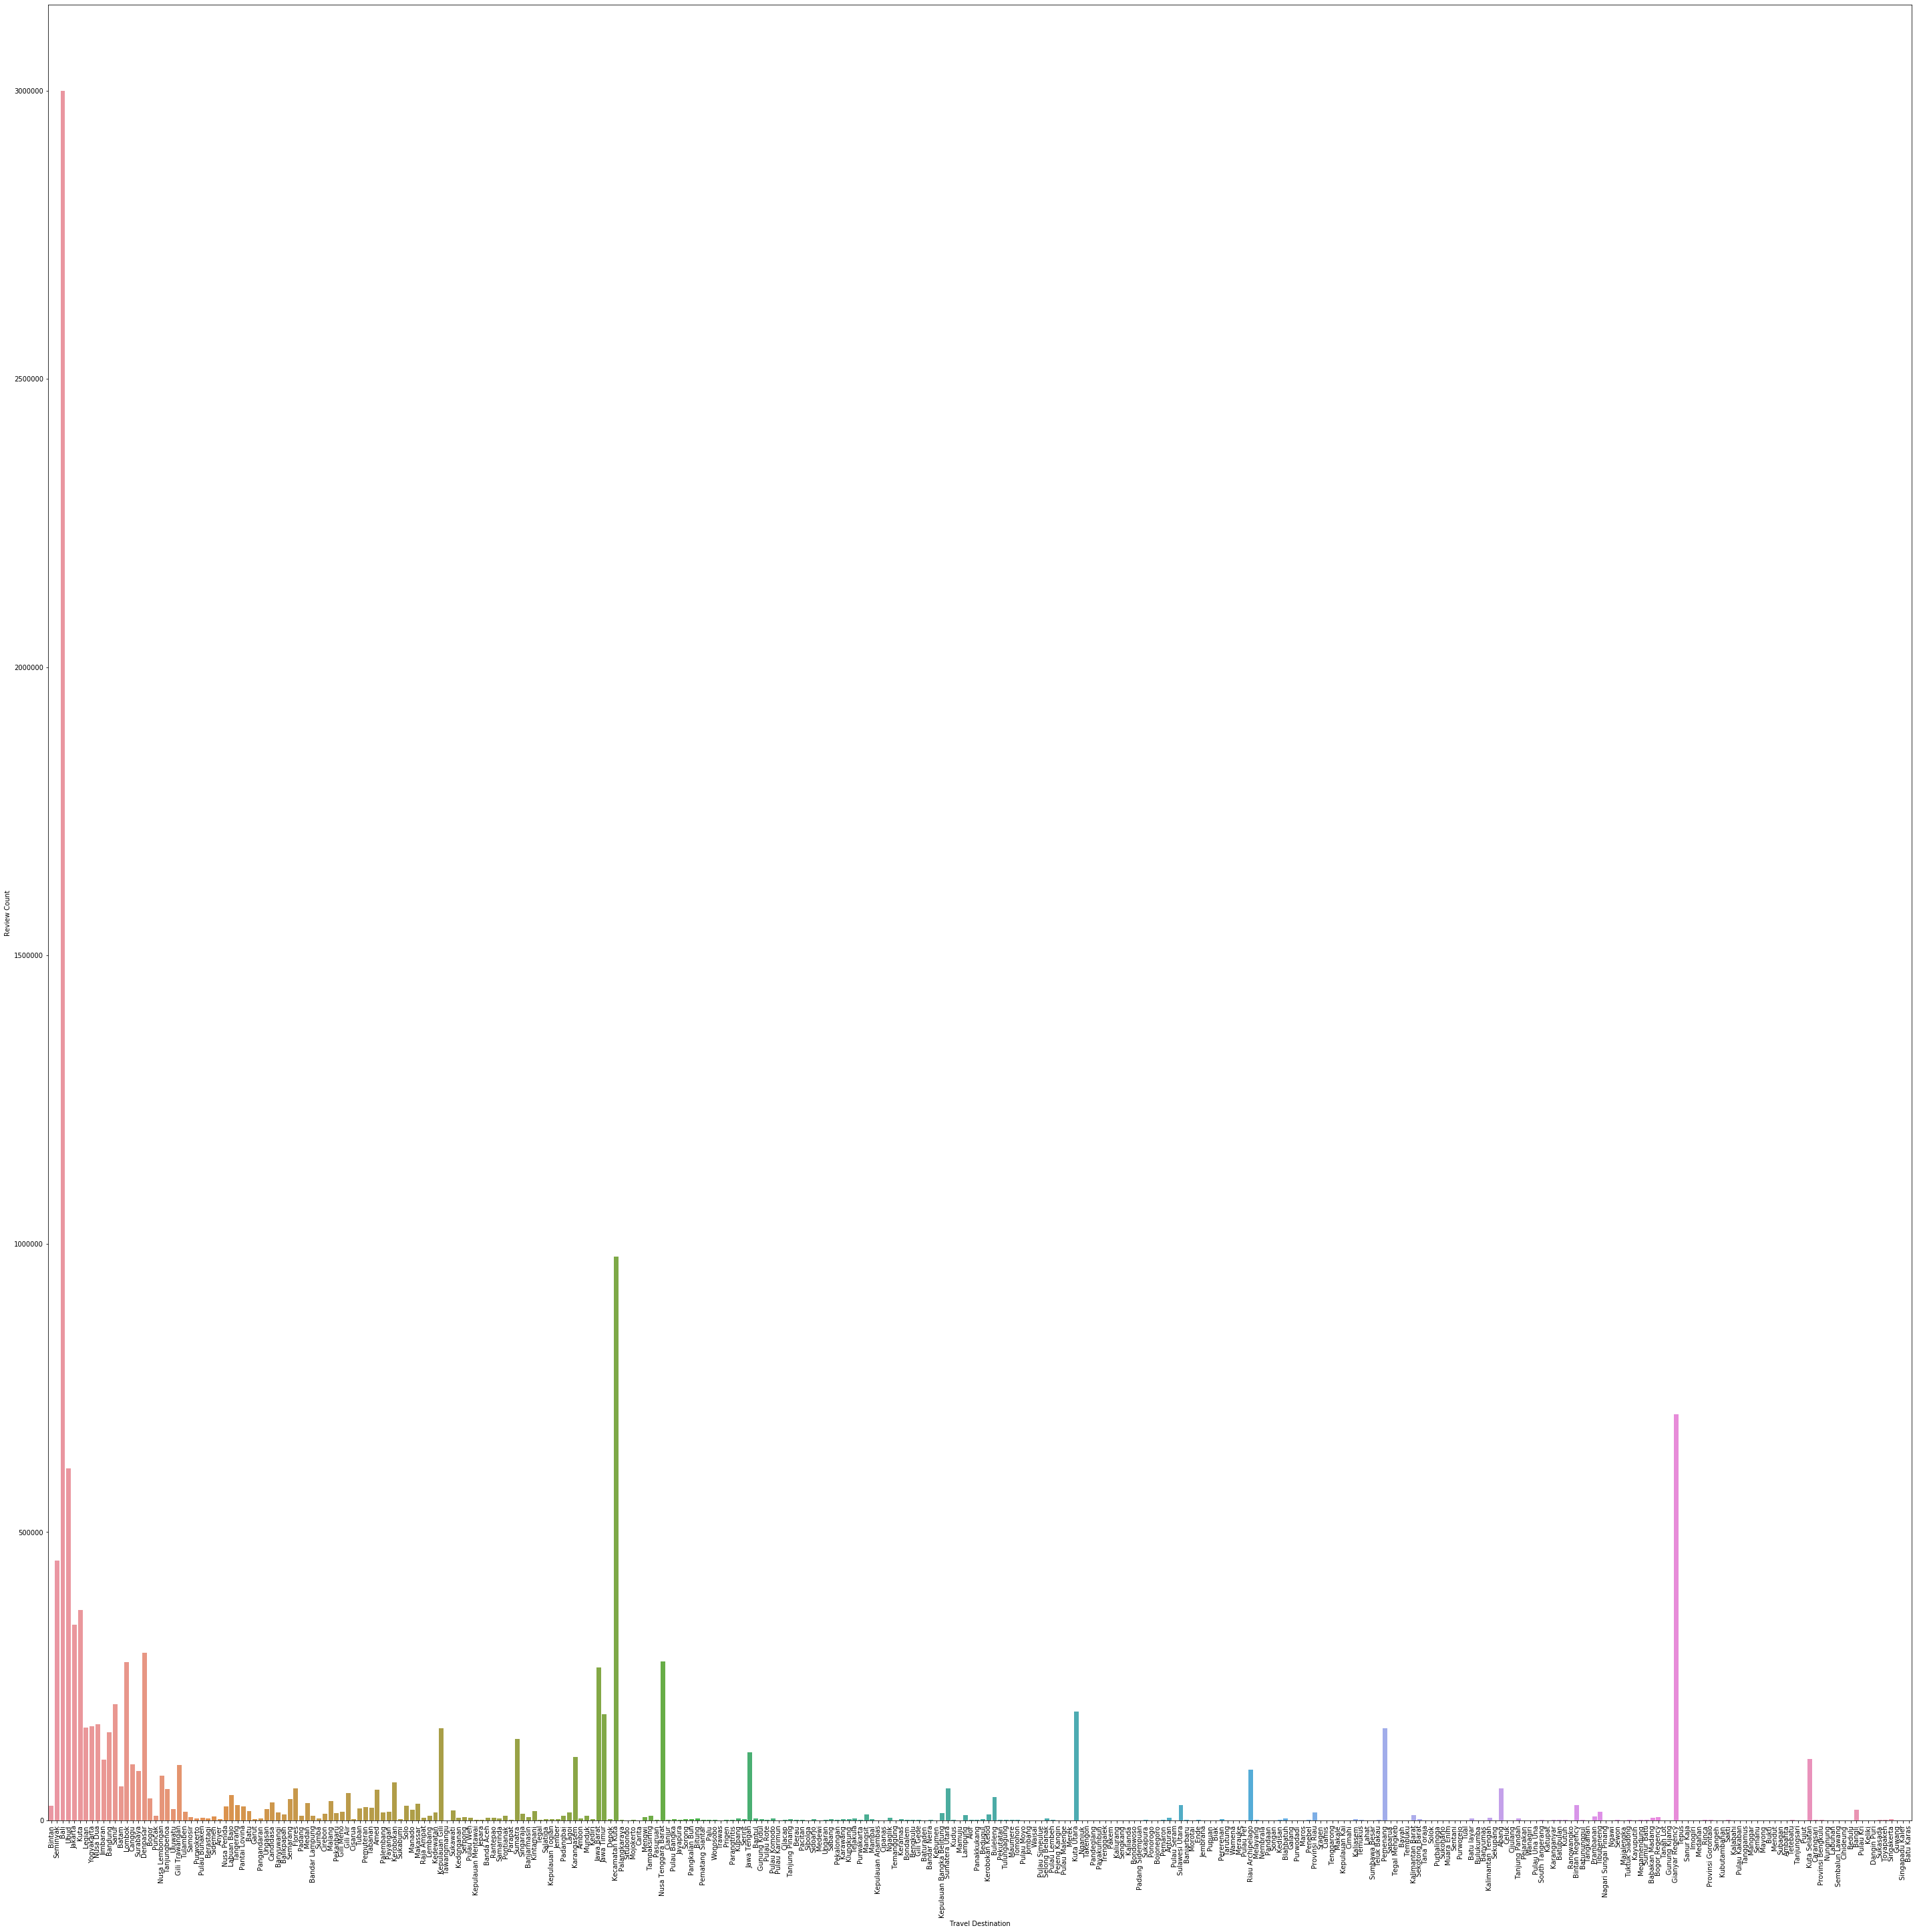

In [88]:
plt.figure(figsize=(50,50))
sns.barplot(x="Travel Destination", y="Review Count", data=df1)
plt.xticks(rotation=90)

In [89]:
df1.describe()

,Review Count,Hotel Best Deal
count,3.200000e+02,3.200000e+02
mean,3.694844e+04,8.599874e+05
std,1.903758e+05,1.301072e+06
min,1.040000e+02,1.063130e+05
25%,3.332500e+02,2.888635e+05
50%,1.485000e+03,5.003880e+05
75%,9.158500e+03,9.433748e+05
max,2.998882e+06,1.593223e+07


In [96]:
df_plot=df1[df1["Review Count"]>df1.describe()["Review Count"]["75%"]]

In [97]:
df_plot

,Country Name,Travel Destination,Things to Do,Location,Review Count,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,tur aktivitasluarruangan transportasi turdenga...,"Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182.0,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
1,Indonesia,Seminyak,tur spadankebugaran aktivitasluarruangan tempa...,"Kecamatan Kuta, Indonesia",451212,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874.0,https://www.tripadvisor.co.id/Flights-g469404-...,Rp 1.305.700
2,Indonesia,Bali,tur aktivitasluarruangan turdenganperahudanola...,Indonesia,2998882,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190.0,https://www.tripadvisor.co.id/Flights-g294226-...,Rp 1.145.870
3,Indonesia,Ubud,tur aktivitasluarruangan spadankebugaran trans...,"Gianyar Regency, Indonesia",610495,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927.0,https://www.tripadvisor.co.id/Flights-g297701-...,Rp 1.145.870
4,Indonesia,Jakarta,tur tempatbelanja spadankebugaran aktivitaslua...,"Jawa, Indonesia",339358,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563.0,https://www.tripadvisor.co.id/Flights-g294229-...,NaN
...,...,...,...,...,...,...,...,...,...
262,Indonesia,Bintan Regency,tur aktivitasluarruangan transportasi turdenga...,"Riau Archipelago, Indonesia",26359,https://www.tripadvisor.co.id/Hotels-g12811408...,1740182.0,https://www.tripadvisor.co.id/Flights-g1281140...,NaN
266,Indonesia,Tibubeneng,spadankebugaran tur kursusdansanggar aktivitas...,"Kuta Utara, Indonesia",14931,https://www.tripadvisor.co.id/Hotels-g10086747...,282645.0,https://www.tripadvisor.co.id/Flights-g1008674...,Rp 1.145.870
279,Indonesia,Gianyar Regency,tur aktivitasluarruangan spadankebugaran turde...,"Bali, Indonesia",704023,https://www.tripadvisor.co.id/Hotels-g15795170...,2865927.0,https://www.tripadvisor.co.id/Flights-g1579517...,Rp 1.145.870
302,Indonesia,Kuta Selatan,tur aktivitasluarruangan turdenganperahudanola...,"Bali, Indonesia",106530,https://www.tripadvisor.co.id/Hotels-g12997472...,3437868.0,https://www.tripadvisor.co.id/Flights-g1299747...,Rp 1.305.700


Text(0, 0.5, 'Popularity')

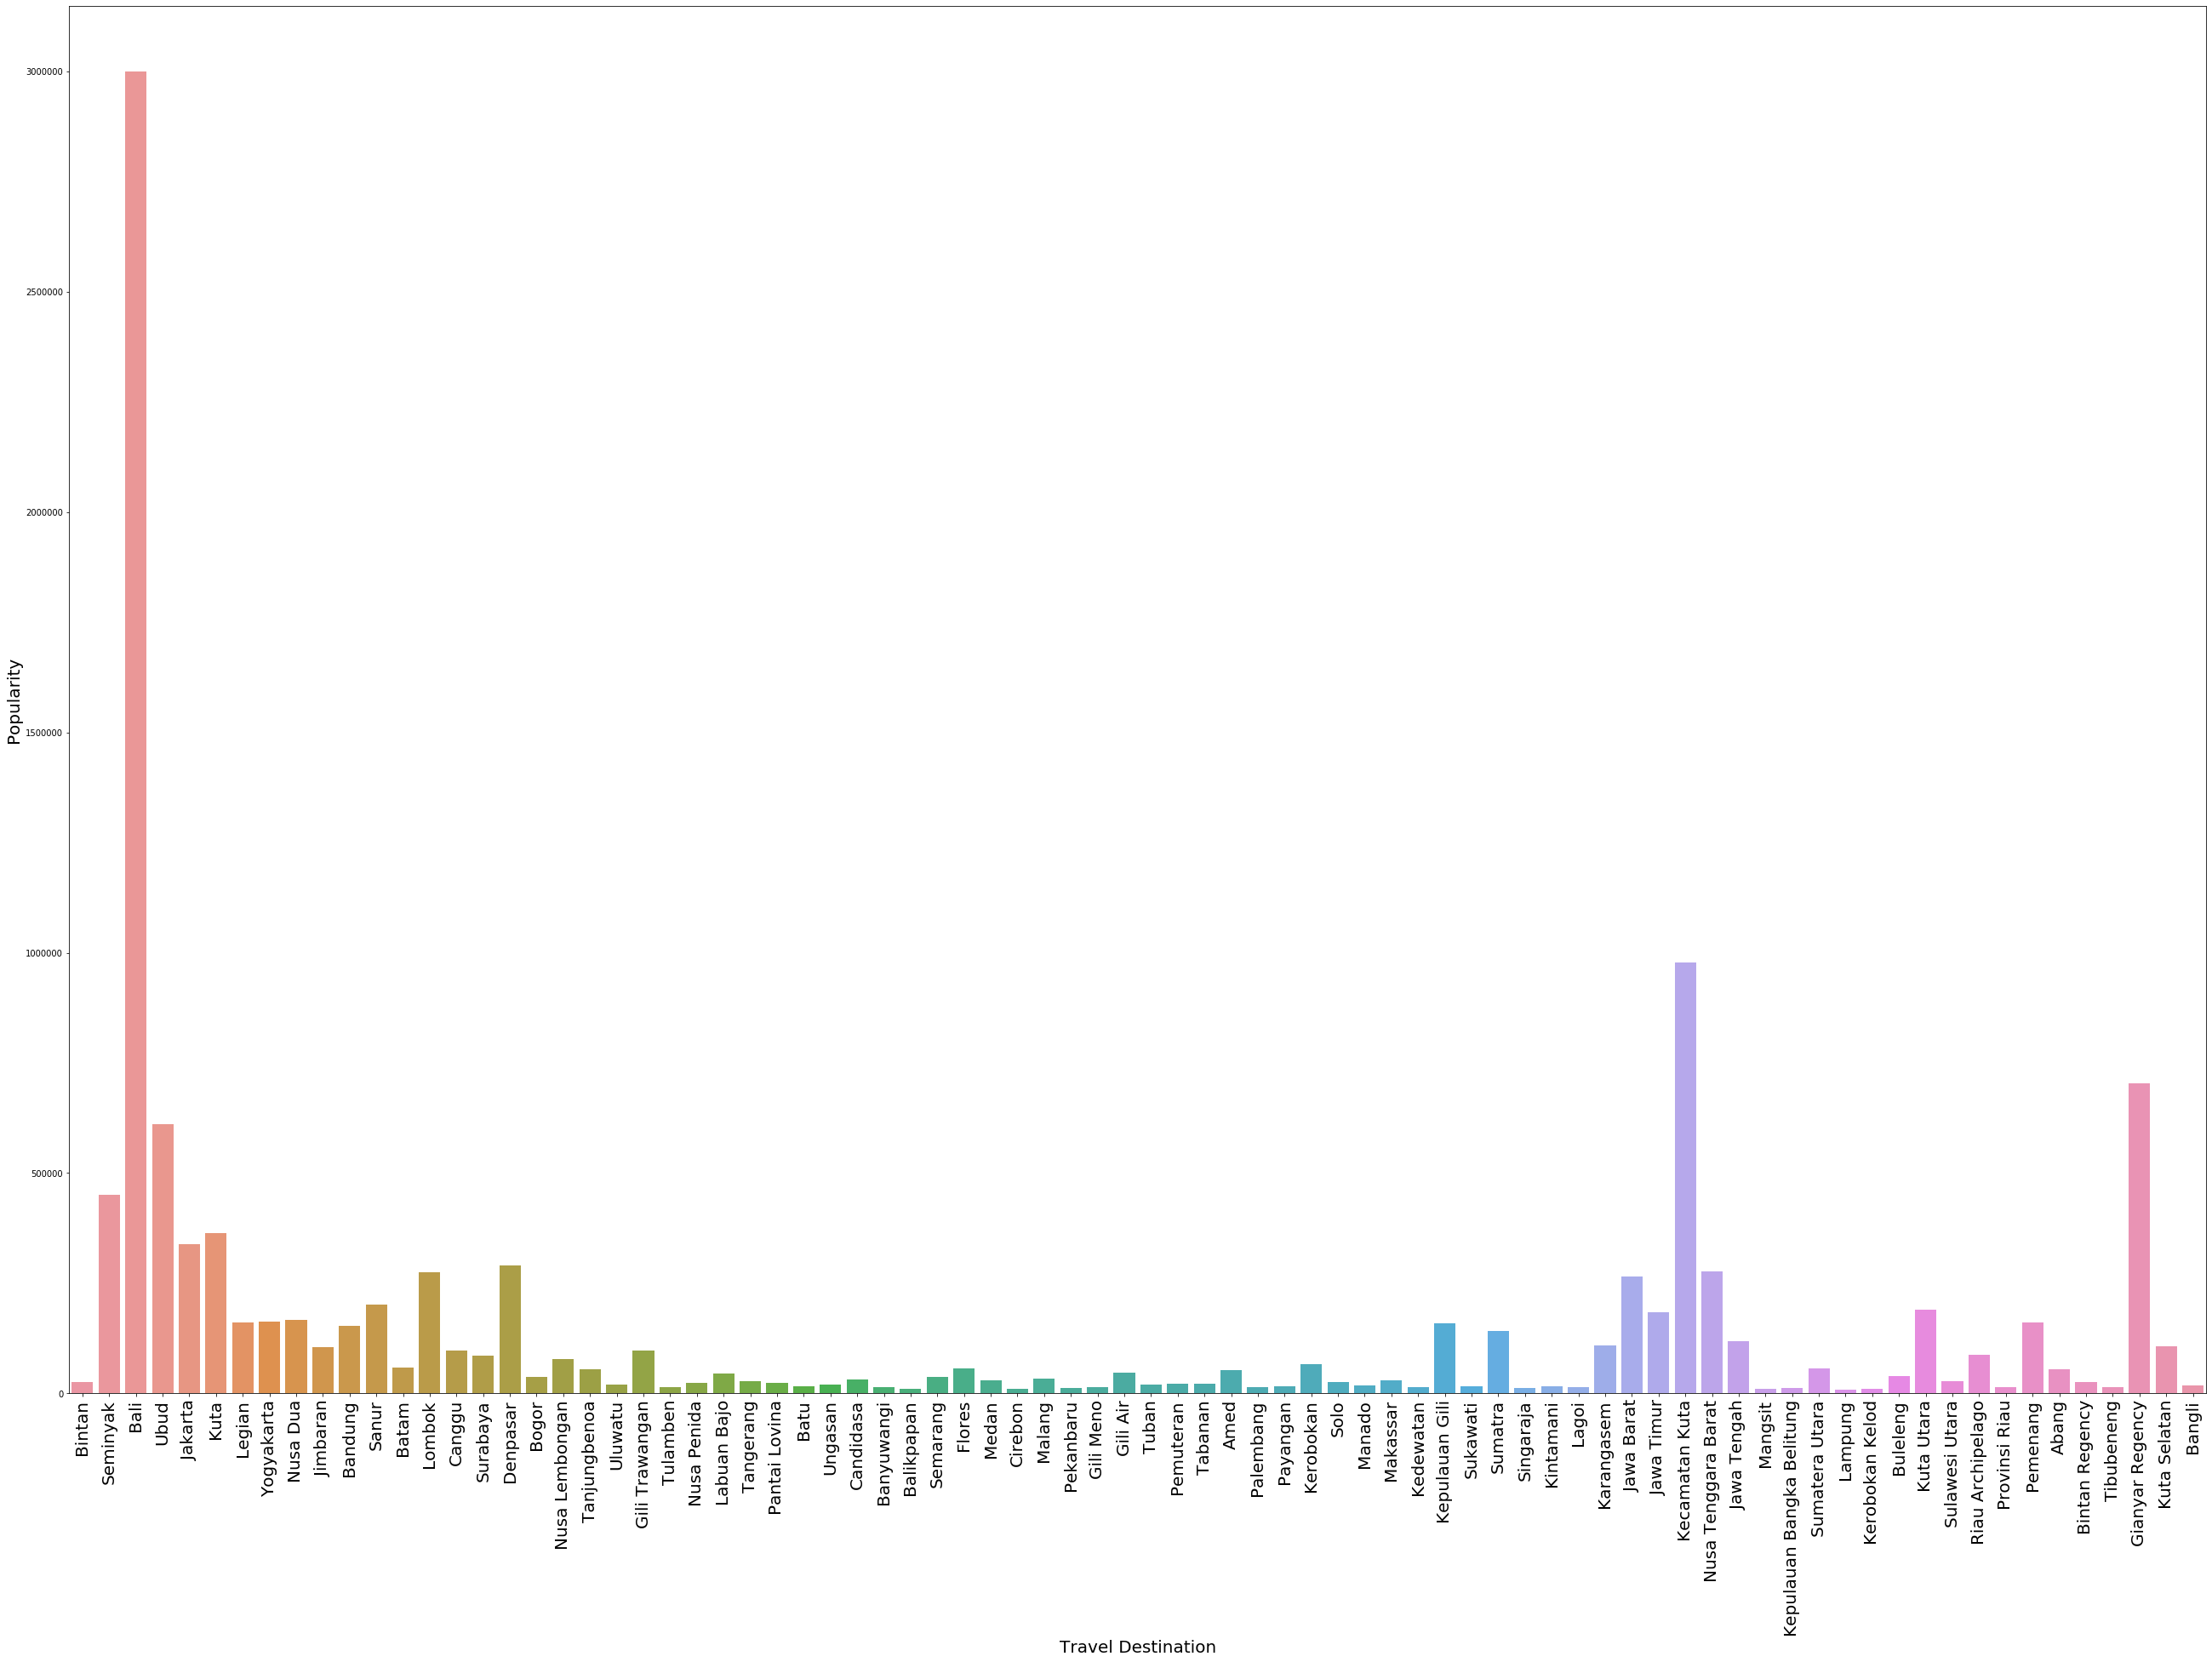

In [154]:
import matplotlib
plt.figure(figsize=(45,30))
# plt.font
sns.barplot(x="Travel Destination", y="Review Count", data=df_plot)
plt.xticks(rotation=90)
matplotlib.rc("xtick",labelsize=20)
plt.xlabel('Travel Destination',fontsize=20)
plt.ylabel('Popularity',fontsize=20)

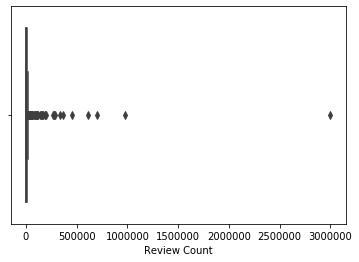

In [95]:
sns.boxplot(df1["Review Count"])

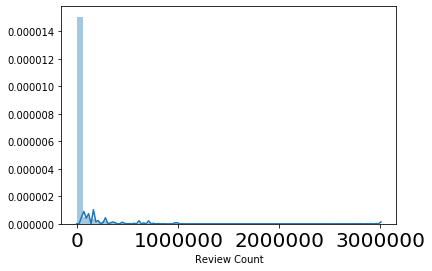

In [110]:
sns.distplot(df1["Review Count"])

In [125]:
df_pop=df1[df1["Review Count"]>max]

In [127]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 310
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        60 non-null     object 
 1   Travel Destination  60 non-null     object 
 2   Things to Do        60 non-null     object 
 3   Location            60 non-null     object 
 4   Review Count        60 non-null     int64  
 5   Hotel Link          60 non-null     object 
 6   Hotel Best Deal     60 non-null     float64
 7   Flight Link         60 non-null     object 
 8   Flight Best Deal    49 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.7+ KB


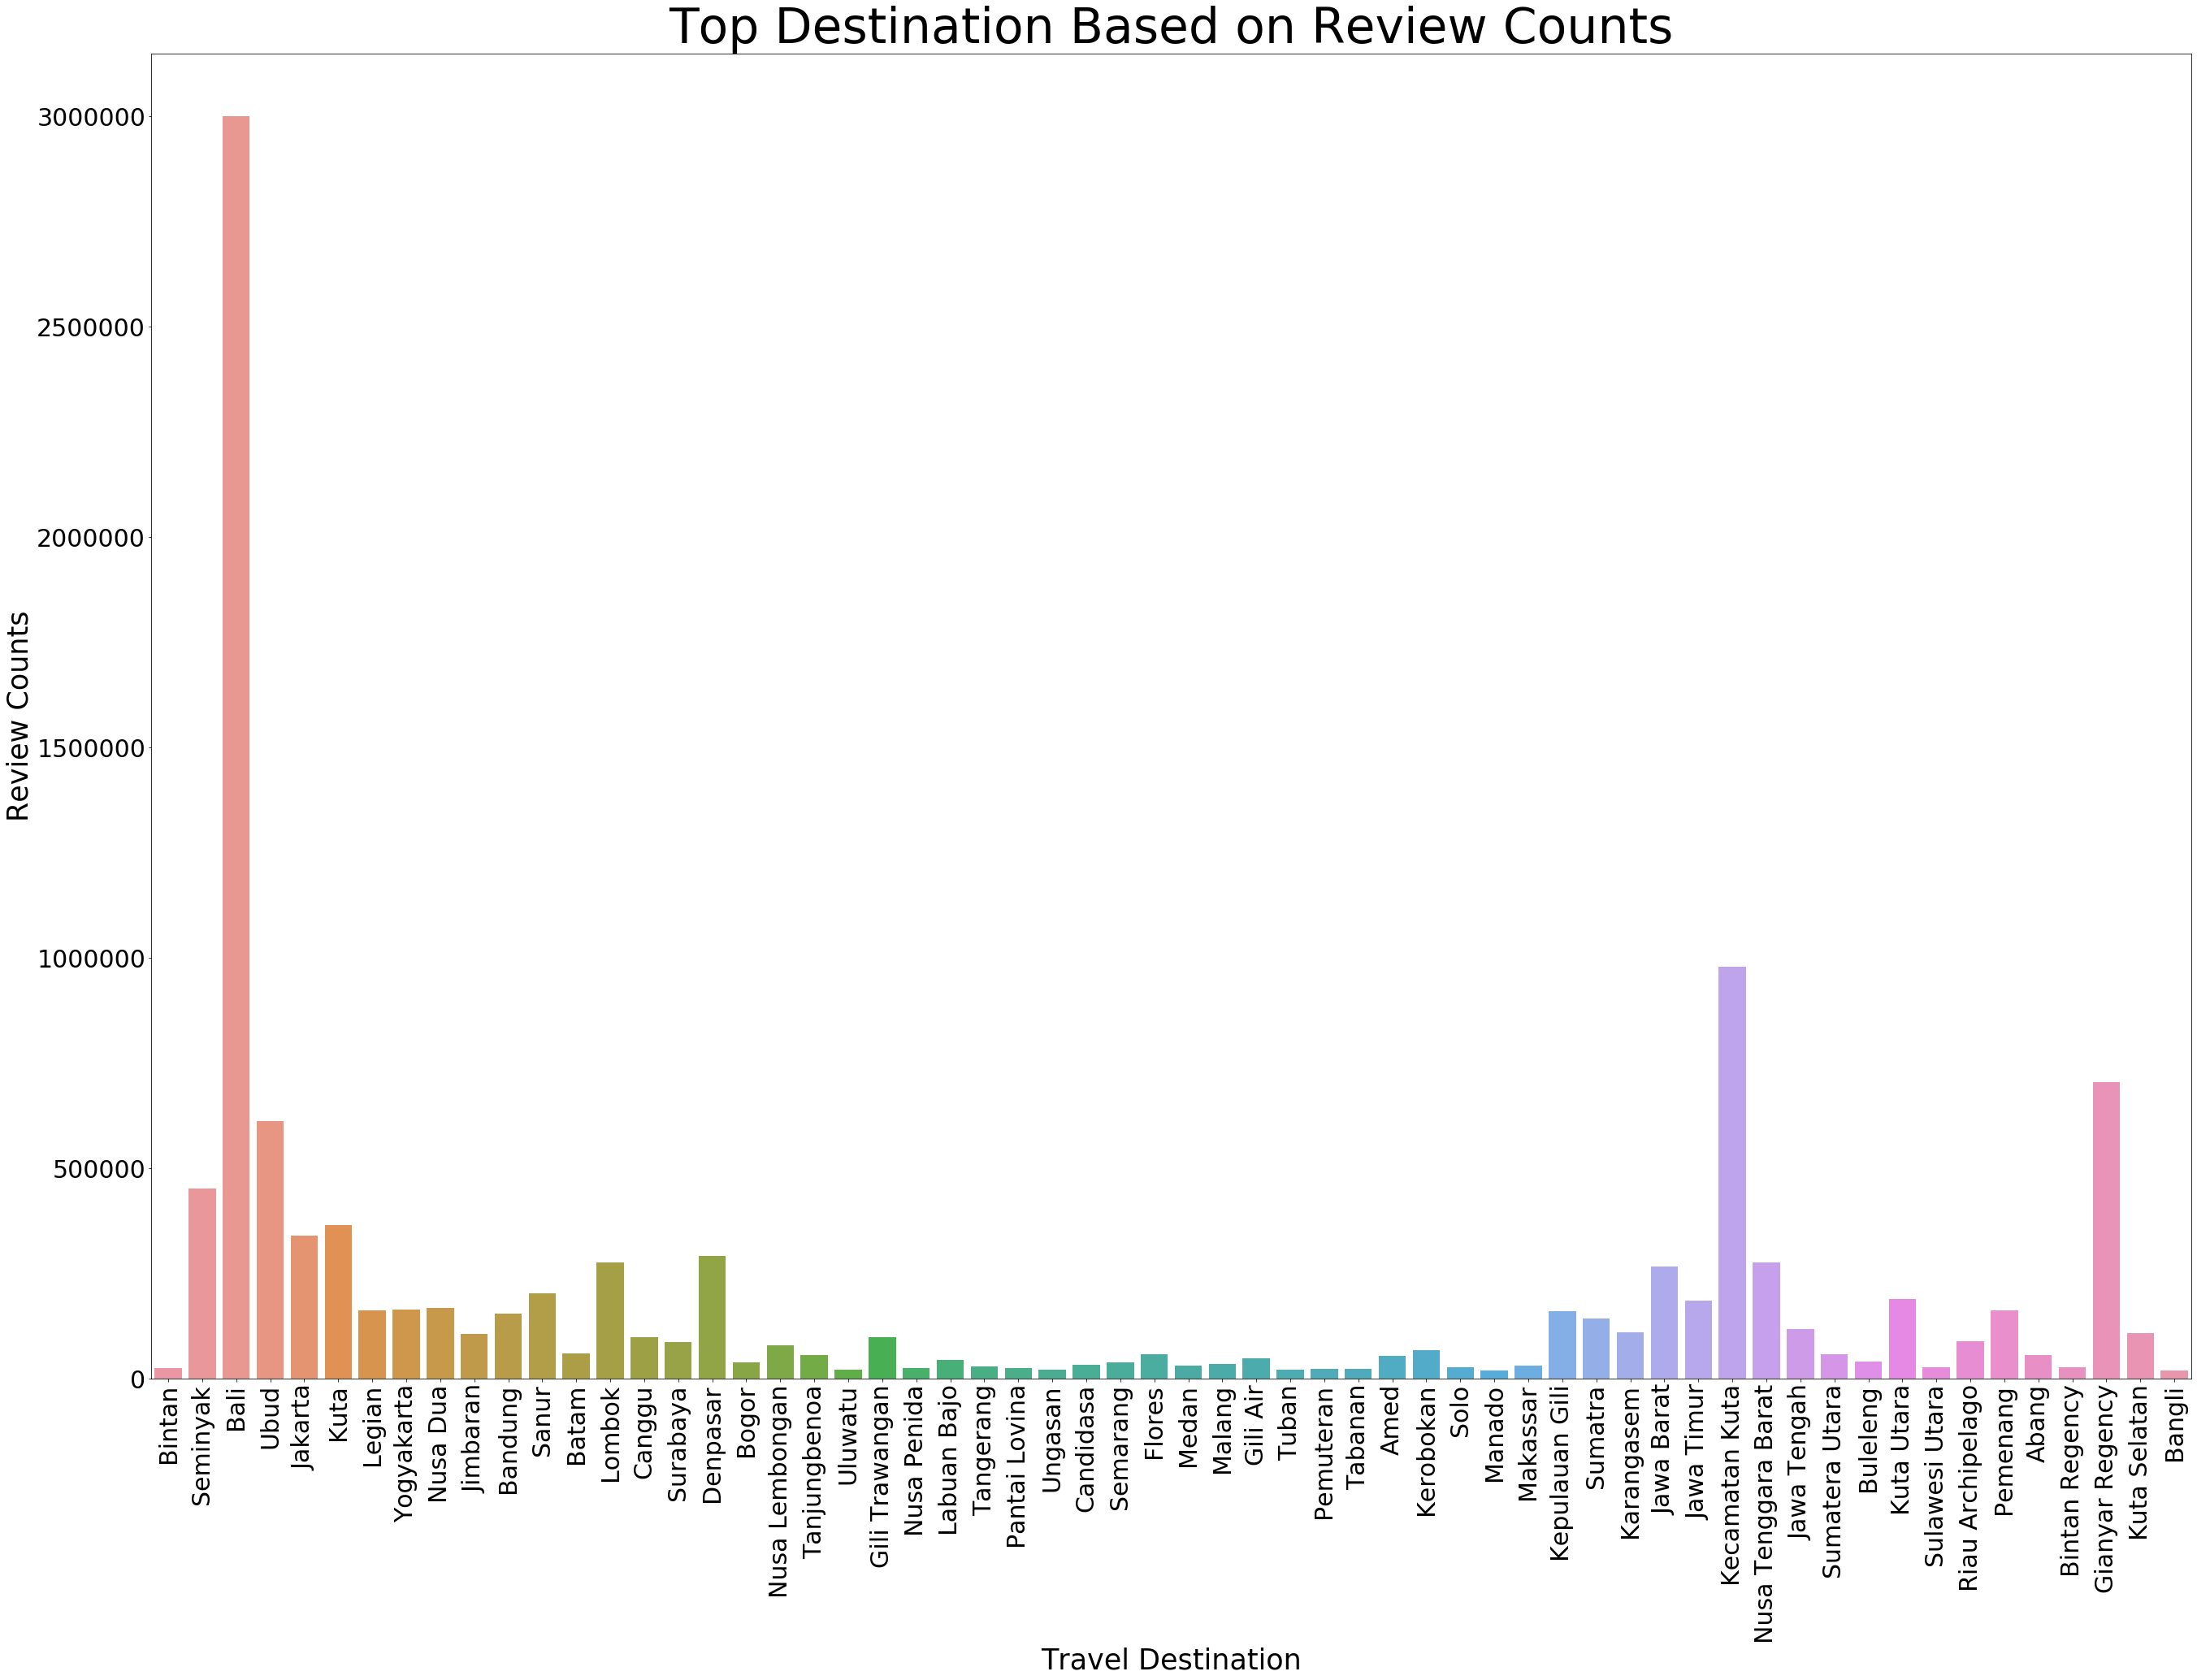

In [175]:
import matplotlib
fig=plt.figure(figsize=(45,30))
# plt.font
sns.barplot(x="Travel Destination", y="Review Count", data=df_pop)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
matplotlib.rc("xtick",labelsize=30)
matplotlib.rc("ytick",labelsize=30)
plt.xlabel('Travel Destination',fontsize=35)
plt.ylabel('Review Counts',fontsize=35)
plt.title("Top Destination Based on Review Counts", fontsize=60)
fig.savefig("cobaplot.png")

In [111]:
IQR=df1.describe()["Review Count"]["75%"]-df1.describe()["Review Count"]["25%"]

In [113]:
IQR

8825.25

In [115]:
min=df1.describe()["Review Count"]["25%"]-IQR
max=df1.describe()["Review Count"]['75%']+IQR

In [123]:
max

17983.75

In [119]:
df_normal=df1[(df1["Review Count"]>min)&(df1["Review Count"]<max)]

In [122]:
df_normal

,Country Name,Travel Destination,Things to Do,Location,Review Count,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
18,Indonesia,Puncak,tur pemandangandantengara wisataalamdantaman a...,"Jawa Barat, Indonesia",8282,https://www.tripadvisor.co.id/Hotels-g844506-P...,611207.0,https://www.tripadvisor.co.id/Flights-g844506-...,NaN
23,Indonesia,Tulamben,tur aktivitasluarruangan turdenganperahudanola...,"Bali, Indonesia",15203,https://www.tripadvisor.co.id/Hotels-g469406-T...,330579.0,https://www.tripadvisor.co.id/Flights-g469406-...,Rp 1.355.103
24,Indonesia,Samosir,wisataalamdantaman pemandangandantengara aktiv...,"Sumatera Utara, Indonesia",6041,https://www.tripadvisor.co.id/Hotels-g303958-S...,185950.0,https://www.tripadvisor.co.id/Flights-g303958-...,Rp 1.358.600
25,Indonesia,Purwokerto,wisataalamdantaman pemandangandantengara hibur...,"Jawa Tengah, Indonesia",3635,https://www.tripadvisor.co.id/Hotels-g790290-P...,428430.0,https://www.tripadvisor.co.id/Flights-g790290-...,NaN
26,Indonesia,Pulau Bunaken,tur turdenganperahudanolahragaair aktivitaslua...,"Manado, Indonesia",4767,https://www.tripadvisor.co.id/Hotels-g1071666-...,1035324.0,https://www.tripadvisor.co.id/Flights-g1071666...,Rp 2.161.400
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,tur turdenganperahudanolahragaair aktivitaslua...,"Nusa Penida, Indonesia",742,https://www.tripadvisor.co.id/Hotels-g14115586...,663636.0,https://www.tripadvisor.co.id/Flights-g1411558...,Rp 1.752.927
316,Indonesia,Singakerta,spadankebugaran tur kursusdansanggar hiburanda...,"Ubud, Indonesia",2019,https://www.tripadvisor.co.id/Hotels-g15880600...,661107.0,https://www.tripadvisor.co.id/Flights-g1588060...,Rp 1.752.927
317,Indonesia,Guwang,wisataalamdantaman cocokuntukpasangan hargater...,"Sukawati, Indonesia",343,https://www.tripadvisor.com/Hotels-g19140131-G...,235636.0,https://www.tripadvisor.com/CheapFlightsSearch...,1724800
318,Indonesia,Singapadu Kaler,tur turdenganperahudanolahragaair aktivitaslua...,"Sukawati, Indonesia",309,https://www.tripadvisor.co.id/Hotels-g20116867...,627097.0,https://www.tripadvisor.co.id/Flights-g2011686...,Rp 1.197.735


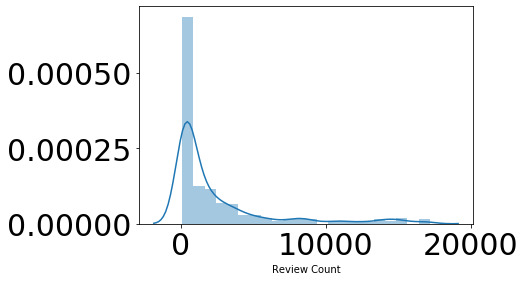

In [176]:
sns.distplot(df_normal["Review Count"])

In [140]:
df1[df1["Travel Destination"]=="Bali"].index[0]

2

In [1]:
import pandas as pd
dfcoba=pd.read_csv("datasetindo_hotel_flight.csv")

In [39]:
df1

,Country Name,Travel Destination,Things to Do,Location,Review Count,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,Indonesia,Bintan,tur aktivitasluarruangan transportasi turdenga...,"Bintan Regency, Indonesia",25006,https://www.tripadvisor.co.id/Hotels-g297718-B...,1740182.0,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
1,Indonesia,Seminyak,tur spadankebugaran aktivitasluarruangan tempa...,"Kecamatan Kuta, Indonesia",451212,https://www.tripadvisor.co.id/Hotels-g469404-S...,2331874.0,https://www.tripadvisor.co.id/Flights-g469404-...,Rp 1.305.700
2,Indonesia,Bali,tur aktivitasluarruangan turdenganperahudanola...,Indonesia,2998882,https://www.tripadvisor.co.id/Hotels-g294226-B...,656190.0,https://www.tripadvisor.co.id/Flights-g294226-...,Rp 1.145.870
3,Indonesia,Ubud,tur aktivitasluarruangan spadankebugaran trans...,"Gianyar Regency, Indonesia",610495,https://www.tripadvisor.co.id/Hotels-g297701-U...,2865927.0,https://www.tripadvisor.co.id/Flights-g297701-...,Rp 1.145.870
4,Indonesia,Jakarta,tur tempatbelanja spadankebugaran aktivitaslua...,"Jawa, Indonesia",339358,https://www.tripadvisor.co.id/Hotels-g294229-J...,360563.0,https://www.tripadvisor.co.id/Flights-g294229-...,NaN
...,...,...,...,...,...,...,...,...,...
315,Indonesia,Toyapakeh,tur turdenganperahudanolahragaair aktivitaslua...,"Nusa Penida, Indonesia",742,https://www.tripadvisor.co.id/Hotels-g14115586...,663636.0,https://www.tripadvisor.co.id/Flights-g1411558...,Rp 1.752.927
316,Indonesia,Singakerta,spadankebugaran tur kursusdansanggar hiburanda...,"Ubud, Indonesia",2019,https://www.tripadvisor.co.id/Hotels-g15880600...,661107.0,https://www.tripadvisor.co.id/Flights-g1588060...,Rp 1.752.927
317,Indonesia,Guwang,wisataalamdantaman cocokuntukpasangan hargater...,"Sukawati, Indonesia",343,https://www.tripadvisor.com/Hotels-g19140131-G...,235636.0,https://www.tripadvisor.com/CheapFlightsSearch...,1724800
318,Indonesia,Singapadu Kaler,tur turdenganperahudanolahragaair aktivitaslua...,"Sukawati, Indonesia",309,https://www.tripadvisor.co.id/Hotels-g20116867...,627097.0,https://www.tripadvisor.co.id/Flights-g2011686...,Rp 1.197.735


In [48]:
for i in dfcoba["Travel Destination"].unique():
    if i not in df1["Travel Destination"].unique():
        print (i)

In [49]:
dfcoba["Travel Destination"].nunique()

320

In [51]:
df1["Travel Destination"].nunique()

320

In [47]:
coba1=[1,2,3,4]
coba2=[1,2,3,4,5]

for i in coba2:
    if i not in coba1 :
        print(i)

5


In [55]:
dfcoba[dfcoba["Travel Destination"].duplicated()]

,Unnamed: 0,Travel Destination,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
8,9,Yogyakarta,https://www.tripadvisor.co.id/Hotels-g294230-Y...,Rp 1.100.000,https://www.tripadvisor.co.id/Flights-g294230-...,Rp 1.787.500
109,111,Pulau Bangka,https://www.tripadvisor.co.id/Hotels-g1234795-...,Rp 384.000,https://www.tripadvisor.co.id/Flights-g1234795...,Rp 1.075.230


In [57]:
dfcoba.loc[dfcoba[dfcoba["Travel Destination"]=="Yogyakarta"].index[0]]["Hotel Best Deal"]

'Rp 1.100.000'

In [41]:
dfcoba["Travel Destination"].unique()

array(['Bintan', 'Seminyak', 'Bali', 'Ubud', 'Jakarta', 'Kuta', 'Legian',
       'Yogyakarta', 'Nusa Dua', 'Jimbaran', 'Bandung', 'Sanur', 'Batam',
       'Lombok', 'Canggu', 'Surabaya', 'Denpasar', 'Bogor', 'Puncak',
       'Nusa Lembongan', 'Tanjungbenoa', 'Uluwatu', 'Gili Trawangan',
       'Tulamben', 'Samosir', 'Purwokerto', 'Pulau Bunaken', 'Berastagi',
       'Sidemen', 'Anyer', 'Nusa Penida', 'Labuan Bajo', 'Tangerang',
       'Pantai Lovina', 'Batu', 'Garut', 'Pangandaran', 'Ungasan',
       'Candidasa', 'Banyuwangi', 'Balikpapan', 'Semarang', 'Flores',
       'Padang', 'Medan', 'Bandar Lampung', 'Sumba', 'Cirebon', 'Malang',
       'Pekanbaru', 'Gili Meno', 'Gili Air', 'Cisarua', 'Tuban',
       'Pemuteran', 'Tabanan', 'Amed', 'Palembang', 'Payangan',
       'Kerobokan', 'Sukabumi', 'Solo', 'Manado', 'Makassar',
       'Raja Ampat', 'Lembang', 'Kedewatan', 'Kepulauan Gili',
       'Tawangmangu', 'Sukawati', 'Kedonganan', 'Serpong', 'Pulau Weh',
       'Kepulauan Mentawai', 'J

In [60]:
dfcoba

,Unnamed: 0,Travel Destination,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal
0,0,Bintan,https://www.tripadvisor.co.id/Hotels-g297718-B...,Rp 1.740.182,https://www.tripadvisor.co.id/Flights-g297718-...,NaN
1,1,Seminyak,https://www.tripadvisor.co.id/Hotels-g469404-S...,Rp 2.331.874,https://www.tripadvisor.co.id/Flights-g469404-...,Rp 1.305.700
2,2,Bali,https://www.tripadvisor.co.id/Hotels-g294226-B...,Rp 656.190,https://www.tripadvisor.co.id/Flights-g294226-...,Rp 1.145.870
3,3,Ubud,https://www.tripadvisor.co.id/Hotels-g297701-U...,Rp 2.865.927,https://www.tripadvisor.co.id/Flights-g297701-...,Rp 1.145.870
4,4,Jakarta,https://www.tripadvisor.co.id/Hotels-g294229-J...,Rp 360.563,https://www.tripadvisor.co.id/Flights-g294229-...,NaN
...,...,...,...,...,...,...
317,20,Toyapakeh,https://www.tripadvisor.co.id/Hotels-g14115586...,Rp 663.636,https://www.tripadvisor.co.id/Flights-g1411558...,Rp 1.752.927
318,21,Singakerta,https://www.tripadvisor.co.id/Hotels-g15880600...,Rp 661.107,https://www.tripadvisor.co.id/Flights-g1588060...,Rp 1.752.927
319,22,Guwang,NaN,NaN,NaN,NaN
320,23,Singapadu Kaler,https://www.tripadvisor.co.id/Hotels-g20116867...,Rp 627.097,https://www.tripadvisor.co.id/Flights-g2011686...,Rp 1.197.735


In [64]:
dfcoba["Flight Info"]=np.nan

In [79]:
dfcoba.drop("Unnamed: 0", axis=1)

,Travel Destination,Hotel Link,Hotel Best Deal,Flight Link,Flight Best Deal,Flight Info
0,Bintan,https://www.tripadvisor.co.id/Hotels-g297718-B...,Rp 1.740.182,https://www.tripadvisor.co.id/Flights-g297718-...,NaN,Flight Data Unavailable
1,Seminyak,https://www.tripadvisor.co.id/Hotels-g469404-S...,Rp 2.331.874,https://www.tripadvisor.co.id/Flights-g469404-...,Rp 1.305.700,Flight Best Deal Rp 1.305.700
2,Bali,https://www.tripadvisor.co.id/Hotels-g294226-B...,Rp 656.190,https://www.tripadvisor.co.id/Flights-g294226-...,Rp 1.145.870,Flight Best Deal Rp 1.145.870
3,Ubud,https://www.tripadvisor.co.id/Hotels-g297701-U...,Rp 2.865.927,https://www.tripadvisor.co.id/Flights-g297701-...,Rp 1.145.870,Flight Best Deal Rp 1.145.870
4,Jakarta,https://www.tripadvisor.co.id/Hotels-g294229-J...,Rp 360.563,https://www.tripadvisor.co.id/Flights-g294229-...,NaN,Flight Data Unavailable
...,...,...,...,...,...,...
317,Toyapakeh,https://www.tripadvisor.co.id/Hotels-g14115586...,Rp 663.636,https://www.tripadvisor.co.id/Flights-g1411558...,Rp 1.752.927,Flight Best Deal Rp 1.752.927
318,Singakerta,https://www.tripadvisor.co.id/Hotels-g15880600...,Rp 661.107,https://www.tripadvisor.co.id/Flights-g1588060...,Rp 1.752.927,Flight Best Deal Rp 1.752.927
319,Guwang,NaN,NaN,NaN,NaN,Flight Data Unavailable
320,Singapadu Kaler,https://www.tripadvisor.co.id/Hotels-g20116867...,Rp 627.097,https://www.tripadvisor.co.id/Flights-g2011686...,Rp 1.197.735,Flight Best Deal Rp 1.197.735


In [76]:
# dfcoba["Flight Info"]=np.nan
for i in range(len(dfcoba)):
    if pd.isnull(dfcoba["Flight Best Deal"][i]):
        dfcoba["Flight Info"][i]="Flight Data Unavailable"
    else:
        dfcoba["Flight Info"][i]="Flight Best Deal "+str(dfcoba["Flight Best Deal"][i])


C:\Users\chiri\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\chiri\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df2

,Travel Destination,Spot / Vendor,Type,Review Count,Link
0,Bintan,Klub Golf Ria Bintan,aktivitasluarruangan,249.0,https://www.tripadvisor.co.id/Attraction_Revie...
1,Bintan,Air Adventures Flying Club Bintan,aktivitasluarruangan,64.0,https://www.tripadvisor.co.id/Attraction_Revie...
2,Bintan,Pantai Trikora,aktivitasluarruangan,125.0,https://www.tripadvisor.co.id/Attraction_Revie...
3,Bintan,Bintan Taxi (民丹岛出租车服务）,aktivitasluarruangan,32.0,https://www.tripadvisor.co.id/Attraction_Revie...
4,Bintan,Klub Golf Bintan Lagoon Resort,aktivitasluarruangan,148.0,https://www.tripadvisor.co.id/Attraction_Revie...
...,...,...,...,...,...
12418,Sangeh,Taman Mumbul,pemandangandantengara,10.0,https://www.tripadvisor.co.id/Attraction_Revie...
12419,Sangeh,Sangeh Traditional Village,pemandangandantengara,4.0,https://www.tripadvisor.co.id/Attraction_Revie...
12420,Sangeh,Pande Made Sutata,tempatbelanja,NaN,https://www.tripadvisor.co.id/Attraction_Revie...
12421,Sangeh,Sangeh Monkey Forest,wisataalamdantaman cocokuntukpasangan hargater...,404.0,https://www.tripadvisor.co.id/Attraction_Revie...


In [13]:
cv = CountVectorizer()
cv_result = cv.fit_transform(df2['Type'])
cv.get_feature_names()

['acara',
 'aktivitasluarruangan',
 'bagussaathujan',
 'berjiwapetualang',
 'cocokuntukanakanak',
 'cocokuntukkelompokbesar',
 'cocokuntukpasangan',
 'cocokuntukpenggemaraktivitasekstrem',
 'hargaterjangkau',
 'hiburandanpermainan',
 'hiburanmalam',
 'kasinodanperjudian',
 'kebunbinatangdanakuarium',
 'konserdanpertunjukan',
 'kursusdansanggar',
 'lokasibulanmadu',
 'makanandanminuman',
 'masukgratis',
 'museum',
 'pemandangandantengara',
 'spadankebugaran',
 'sumberinformasiwisatawan',
 'tamanairdantamanhiburan',
 'tempatbelanja',
 'tempatyangbelumpopuler',
 'wisataalamdantaman']